In [1]:
import pandas as pd
import numpy as np

from utils import column_name_mapping

In [2]:
df_main = pd.read_csv('data/Case Rigshospitalet.csv')

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_13800\2578241201.py:1: DtypeWarning: Columns (9,13,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv('data/Case Rigshospitalet.csv')


In [3]:
# renaming columns to english
df_main = df_main.rename(columns=column_name_mapping)

In [4]:
df_main.info()
df_main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658066 entries, 0 to 4658065
Data columns (total 24 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   patientID                    object
 1   patientContactID             int64 
 2   patientAgeAtContactStart     int64 
 3   contactStartDate             object
 4   contactEndDate               object
 5   contactType                  object
 6   appointmentUrgency           object
 7   patientContactType           object
 8   primaryDiagnosisCode         object
 9   secondaryDiagnosisCode       object
 10  responsibleDepartment        object
 11  contactDurationHours         object
 12  procedureCode                object
 13  procedureSupplementaryCodes  object
 14  procedurePerformed           object
 15  treatmentContactID           object
 16  visitType                    object
 17  patientGender                object
 18  patientMaritalStatus         object
 19  patientRegisteredInMy

,patientID,patientContactID,patientAgeAtContactStart,contactStartDate,contactEndDate,contactType,appointmentUrgency,patientContactType,primaryDiagnosisCode,secondaryDiagnosisCode,...,procedurePerformed,treatmentContactID,visitType,patientGender,patientMaritalStatus,patientRegisteredInMySP,patientCountry,patientRegion,patientPostalCode,patientMunicipality
0,Z4115614,1301023075465,0,"2023-01-13 12:32:00,000","2023-01-13 13:02:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-13 12:32:00,000",176.794.528,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
1,Z4115614,1301023121831,0,"2023-01-15 13:27:00,000","2023-01-15 13:57:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-15 13:27:00,000",177.035.032,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
2,Z4119225,1301023357249,0,"2023-01-30 10:20:00,000","2023-01-30 10:50:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-30 10:20:00,000",178.269.449,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
3,Z4127033,1301023443807,0,"2023-02-04 12:46:00,000","2023-02-04 13:16:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-02-04 12:46:00,000",178.703.583,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
4,Z4127033,1301023443875,0,"2023-02-05 12:22:00,000","2023-02-05 12:52:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-02-05 12:22:00,000",178.703.779,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København


In [5]:
# Delete information from people not living in Denmark (patientPostalCode is only available for Denmark)
# Filter to keep only rows where patientCountry is "Denmark"
df_main_cleaned = df_main[df_main["patientCountry"] == "Danmark"]

# Check how many rows were removed
print(f"Rows removed (non-Denmark patients): {len(df_main) - len(df_main_cleaned)}")

df_main_cleaned


Rows removed (non-Denmark patients): 53087


,patientID,patientContactID,patientAgeAtContactStart,contactStartDate,contactEndDate,contactType,appointmentUrgency,patientContactType,primaryDiagnosisCode,secondaryDiagnosisCode,...,procedurePerformed,treatmentContactID,visitType,patientGender,patientMaritalStatus,patientRegisteredInMySP,patientCountry,patientRegion,patientPostalCode,patientMunicipality
0,Z4115614,1301023075465,0,"2023-01-13 12:32:00,000","2023-01-13 13:02:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-13 12:32:00,000",176.794.528,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
1,Z4115614,1301023121831,0,"2023-01-15 13:27:00,000","2023-01-15 13:57:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-15 13:27:00,000",177.035.032,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
2,Z4119225,1301023357249,0,"2023-01-30 10:20:00,000","2023-01-30 10:50:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-30 10:20:00,000",178.269.449,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
3,Z4127033,1301023443807,0,"2023-02-04 12:46:00,000","2023-02-04 13:16:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-02-04 12:46:00,000",178.703.583,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
4,Z4127033,1301023443875,0,"2023-02-05 12:22:00,000","2023-02-05 12:52:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-02-05 12:22:00,000",178.703.779,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658061,Z3524545,1301024938526,39,"2023-05-31 09:26:00,000","2023-05-31 10:15:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ340,DZ358N,...,"2023-05-31 09:26:00,000",186.485.010,OBST RH LÆGE*,Kvinde,Ugift,J,Danmark,Hovedstaden (84),2100,København
4658062,Z3524545,1301025230953,40,"2023-06-13 12:39:00,000","2023-06-13 13:20:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ340,DZ358N,...,"2023-06-13 12:39:00,000",188.005.341,OBST SÅRBAR 40,Kvinde,Ugift,J,Danmark,Hovedstaden (84),2100,København
4658063,Z3524545,1301025584370,40,"2023-06-27 12:22:00,000","2023-06-27 13:00:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ340,DZ358N,...,"2023-06-27 12:22:00,000",189.818.472,OBST RH LÆGE*,Kvinde,Ugift,J,Danmark,Hovedstaden (84),2100,København
4658064,Z3524545,1301025584370,40,"2023-06-27 12:22:00,000","2023-06-27 13:00:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ340,DZ358N,...,"2023-06-27 12:22:00,000",189.818.472,OBST RH LÆGE*,Kvinde,Ugift,J,Danmark,Hovedstaden (84),2100,København


In [6]:
# Load diagnosis dimension table
df_diagnosis = pd.read_csv('data/Translated diagnosis dimension table.csv')

In [7]:
# Check for missing values in postal codes
missing_postal = df_main['patientPostalCode'].isna().sum()
print(f"Missing postal codes: {missing_postal}")

# Drop rows where patientPostalCode is missing
df_main = df_main.dropna(subset=['patientPostalCode'])

# Check if all postal codes are numeric (sometimes they are stored as strings with letters)
df_main['patientPostalCode'] = df_main['patientPostalCode'].astype(str).str.strip()  # Remove spaces


Missing postal codes: 33535


In [8]:
# Get the unique postal codes
unique_postal_codes = df_main['patientPostalCode'].unique()
print(f"Unique postal codes: {len(unique_postal_codes)}")

# Get the unique diseases
unique_diseases = df_main['primaryDiagnosisCode'].nunique()
print(f"Unique diseases (codes): {unique_diseases}")


Unique postal codes: 2694
Unique diseases (codes): 8166


In [9]:
# Merge primary diagnosis with disease names
df_main = df_main.merge(df_diagnosis, how="left", left_on="primaryDiagnosisCode", right_on="Diagnosis")

# Drop the redundant Diagnosis column
df_main.drop(columns=["Diagnosis"], inplace=True)

# Check if there are still missing disease names after merging
missing_disease_names = df_main['Disease Name'].isna().sum()
print(f"Missing disease names after merge: {missing_disease_names}")


Missing disease names after merge: 1925


In [10]:
# Aggregate data: Count occurrences of diseases by postal code
df_geo_data = df_main.groupby(["patientPostalCode", "Disease Name"]).size().reset_index(name="Visit Count")

# Display summary
df_geo_data.info()
df_geo_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193691 entries, 0 to 193690
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   patientPostalCode  193691 non-null  object
 1   Disease Name       193691 non-null  object
 2   Visit Count        193691 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.4+ MB


,patientPostalCode,Disease Name,Visit Count
0,0,Arteriosclerotic heart disease,1
1,0.0,Arteriosclerotic heart disease,1
2,0.0,Back pain Uns,3
3,0.0,Contact mhp. study as part of a clinical resea...,1
4,0.0,Fam Anamn. M Hereditarian Non-Polypos Colorect...,3


In [16]:
# Check all unique postal codes
unique_postal_codes = df_geo_data["patientPostalCode"].unique()

# Convert to DataFrame for easier inspection
df_unique_postal_codes = pd.DataFrame(unique_postal_codes, columns=["Unique Postal Codes"])

df_unique_postal_codes.to_csv('test/postal codes2.csv', index=False)

In [15]:
import pandas as pd

# Function to check if a postal code is valid
def is_valid_postal(postal):
    postal = str(postal).strip()  # Remove spaces
    postal = postal.split(".")[0] if "." in postal else postal  # Remove decimals
    
    # Remove known invalid values
    invalid_values = ["0", "000", "0000", "00000", "_", "XX00 0XX", "X00 0XX"]
    if postal in invalid_values:
        return False

    # Remove special character formats (like 01423-000 or 05029-020)
    if "-" in postal or "/" in postal or "_" in postal:
        return False

    # Convert to integer if possible
    try:
        postal_int = int(postal)
    except ValueError:
        return False  # If it contains letters, it's invalid

    # Remove numbers outside valid Danish postal code range (1000-9999)
    if postal_int < 1000 or postal_int > 9999:
        return False

    return True

# Apply filtering to keep only valid Danish postal codes
df_geo_data = df_geo_data[df_geo_data["patientPostalCode"].apply(is_valid_postal)]

df_geo_data


,patientPostalCode,Disease Name,Visit Count
253,000003138,Recution resolution with rupture,1
264,01010,HIV disease with hematological and immunologic...,4
265,01237,Contact mhp. Examination of eyes or sight,5
268,02946,Foreign body in Cornea,2
269,03039,Condition with Pacemaker UNS,1
...,...,...,...
193626,9999.0,Tension headache,1
193627,9999.0,Tinnitus,3
193628,9999.0,Traumatic rupture of eardrum,10
193629,9999.0,Type 2 diabetes with multiple complications,1


In [17]:
import pandas as pd

# Function to check if a postal code is valid
def is_valid_danish_postal(postal):
    postal = str(postal).strip()  # Remove spaces
    postal = postal.split(".")[0] if "." in postal else postal  # Remove decimals
    
    # Remove known invalid values and placeholders
    invalid_values = ["0", "000", "0000", "00000", "_", "9999"]
    if postal in invalid_values:
        return False

    # Remove long numbers (more than 4 digits)
    if len(postal) > 4:
        return False

    # Convert to integer if possible
    try:
        postal_int = int(postal)
    except ValueError:
        return False  # If it contains letters or special characters, it's invalid

    # Danish postal codes range from 1000 to 9990
    if postal_int < 1000 or postal_int > 9990:
        return False

    return True

# Apply filtering to keep only valid Danish postal codes
df_geo_data = df_geo_data[df_geo_data["patientPostalCode"].apply(is_valid_danish_postal)]

df_geo_data



,patientPostalCode,Disease Name,Visit Count
513,1000,Atoxic struma uns,2
514,1000,Keratitis Uns,1
530,1020,Rupture of retina without solution,12
531,1024,Pregnancy with dead retinated fetus (missed ab...,3
532,1030,Observation due to suspicion of infection,2
...,...,...,...
193063,9990.0,Intracerebral bleeding in brain semi -sphere uns,2
193064,9990.0,Liquorrhoea cerebrospinalis,4
193065,9990.0,Pregnancy after previous concept of the cervix,8
193066,9990.0,"Pregnancy, first -time birth",5


In [38]:
df_geo_data["patientPostalCode"] = df_geo_data["patientPostalCode"].astype(str).str.split('.').str[0]

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_13800\3223343059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_data["patientPostalCode"] = df_geo_data["patientPostalCode"].astype(str).str.split('.').str[0]


In [57]:
df_geo_data.rename(columns={'patientPostalCode': 'Postal Code'}, inplace=True)

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_13800\3435061065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_data.rename(columns={'patientPostalCode': 'Postal Code'}, inplace=True)


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of patients per postal code
postal_counts = df_geo_data["Postal Code"].value_counts().reset_index()
postal_counts.columns = ["Postal Code", "Patient Count"]

postal_counts


,Postal Code,Patient Count
0,2100,3878
1,2300,3600
2,2000,3296
3,2200,3164
4,2650,2640
...,...,...
1090,2024,1
1091,2120,1
1092,7980,1
1093,2383,1


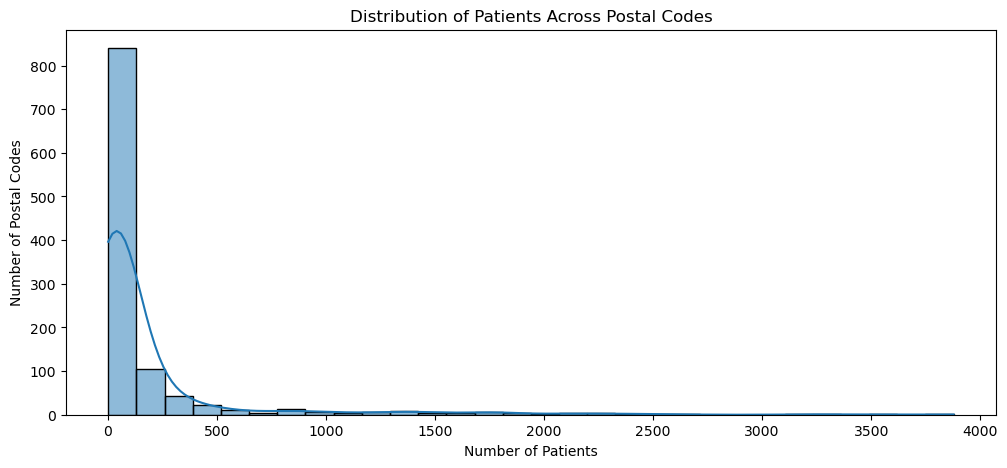

In [40]:
# Plot patient distribution by postal codes
plt.figure(figsize=(12, 5))
sns.histplot(data=postal_counts, x="Patient Count", bins=30, kde=True)
plt.xlabel("Number of Patients")
plt.ylabel("Number of Postal Codes")
plt.title("Distribution of Patients Across Postal Codes")
plt.show()


   Postal Code  Patient Count  Cumulative %
0         2100           3878      0.020285
1         2300           3600      0.039117
2         2000           3296      0.056358
3         2200           3164      0.072908
4         2650           2640      0.086718
5         2500           2488      0.099732
6         2770           2393      0.112250
7         2400           2388      0.124741
8         2630           2267      0.136600
9         4000           2267      0.148458
10        2700           2234      0.160144
11        2610           2144      0.171359
12        2860           2110      0.182396
13        3400           2077      0.193261
14        2800           2038      0.203921
15        2620           1911      0.213917
16        2600           1885      0.223778
17        2720           1824      0.233319
18        2605           1814      0.242808
19        2750           1810      0.252275
20        2450           1795      0.261665
21        2730           1763   

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_13800\4040566817.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_postals_50, x="Postal Code", y="Patient Count", palette="viridis")


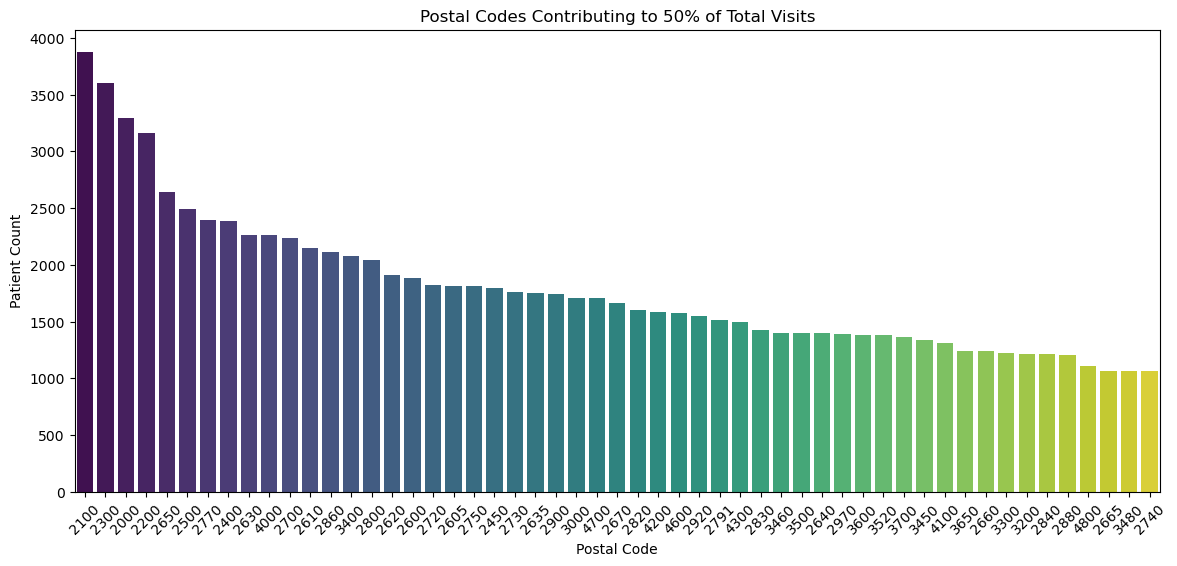

In [52]:

postal_counts = postal_counts.sort_values(by="Patient Count", ascending=False)

# Calculate cumulative percentage of visits
postal_counts["Cumulative %"] = postal_counts["Patient Count"].cumsum() / postal_counts["Patient Count"].sum()

# Select postal codes that account for 80% of total visits
top_postals_50 = postal_counts[postal_counts["Cumulative %"] <= 0.50]

print(top_postals_50)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_postals_50, x="Postal Code", y="Patient Count", palette="viridis")
plt.xlabel("Postal Code")
plt.ylabel("Patient Count")
plt.title("Postal Codes Contributing to 50% of Total Visits")
plt.xticks(rotation=45)
plt.show()



In [54]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------------- ------------------- 61.4/125.4 kB 550.5 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [61]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="postal_code_locator")

# Function to get latitude and longitude
def get_lat_lon(postal_code, country="Denmark"):
    try:
        location = geolocator.geocode(f"{postal_code}, {country}", timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        time.sleep(1)  # Wait and retry if timed out
        return get_lat_lon(postal_code, country)

# Apply geolocation lookup only for the postal codes in top_postals_50
top_postals_50["Latitude"], top_postals_50["Longitude"] = zip(*top_postals_50["Postal Code"].apply(lambda x: get_lat_lon(x)))

top_postals_50


,Postal Code,Patient Count,Cumulative %,Latitude,Longitude
0,2100,3878,0.020285,55.707117,12.572069
1,2300,3600,0.039117,55.650905,12.602597
2,2000,3296,0.056358,55.682545,12.517936
3,2200,3164,0.072908,55.694918,12.550123
4,2650,2640,0.086718,55.636703,12.471600
5,2500,2488,0.099732,55.660957,12.500673
6,2770,2393,0.112250,55.622857,12.608050
7,2400,2388,0.124741,55.708594,12.526315
8,2630,2267,0.136600,55.649988,12.290249
9,4000,2267,0.148458,55.650430,12.087345


In [62]:
import folium

# Initialize a map centered around Denmark
denmark_map = folium.Map(location=[56.2639, 9.5018], zoom_start=7)

# Add markers for each postal code
for _, row in top_postals_50.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,  # Adjust size for visibility
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        popup=f"Postal Code: {row['Postal Code']}<br>Patients: {row['Patient Count']}",
    ).add_to(denmark_map)

# Display the map
denmark_map


In [63]:
from folium.plugins import HeatMap

# Initialize a map centered on Denmark
denmark_heatmap = folium.Map(location=[56.2639, 9.5018], zoom_start=7)

# Extract latitude, longitude, and patient count for weighting
heat_data = top_postals_50[['Latitude', 'Longitude', 'Patient Count']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(denmark_heatmap)

# Display the map
denmark_heatmap
